In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(self.lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})



In [3]:
import random
import math
from random import randint

In [4]:
%matplotlib notebook

a = [(randint(-1000,1000), randint(-1000,1000)) for _ in range(10**5)]
Plot([PointsCollection(a)]).draw()

<IPython.core.display.Javascript object>

In [5]:
%matplotlib notebook

b = [(randint(-10**14,10**14), randint(-10**14,10**14)) for _ in range(10**5)]
Plot([PointsCollection(b)]).draw()

<IPython.core.display.Javascript object>

In [6]:
%matplotlib notebook

r = 100
c = [None] * 1000
for i in range(1000):
    d = random.random() * (2*math.pi)
    c[i] = (r*math.sin(d), r*math.cos(d))

Plot([PointsCollection(c)]).draw()

<IPython.core.display.Javascript object>

In [7]:
%matplotlib notebook

pa = [-1.0,0.0]
pb = [1.0,0.1]
d = [None] * 1000
for i in range(1000):
    x = randint(-1000,1000)
    d[i] = (x, (pa[1]-pb[1])/(pa[0]-pb[0])*x+(pa[1]-(pa[1]-pb[1])/(pa[0]-pb[0])*pa[0]))

Plot([PointsCollection(d)]).draw()


<IPython.core.display.Javascript object>

In [8]:
def det1(a,b,c):
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-c[0]*b[1]-a[1]*b[0]-a[0]*c[1]

In [9]:
def det2(a,b,c):
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

In [10]:
def classify(points, detFun, e = 10** -14, a = (-1.0,0.0), b = (1.0,0.1)):
    res = {
        'left': [],
        'right': [],
        'collinear': []
    }

    for p in points:
        d = detFun(a,b,p)

        if d > e:
            res['right'].append(p)
        elif d < -e:
            res['left'].append(p)
        else:
            res['collinear'].append(p)
    return res

In [11]:
def plotClassification(points, detFun, e = 10**-14, a = (-1.0,0.0), b = (1.0,0.1)):
    res = classify(points,detFun,e,a,b)

    classified = [PointsCollection(res['left'], color='yellow'),
                  PointsCollection(res['right'], color= 'grey'),
                  PointsCollection(res['collinear'], color= 'pink')]
    Plot(classified).draw()

    print("Left: ",len(res['left']))
    print("Right: ",len(res['right']))
    print("Collinear: ",len(res['collinear']))

Left:  118
Right:  197
Collinear:  685


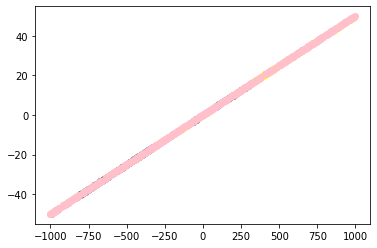

In [14]:
%matplotlib inline
plotClassification(d,det2)

In [13]:
print()
